In [3]:
import pandas as pd

# 'all-states-history.csv' debe estar en la misma carpeta que este notebook.
archivo_local = "all-states-history.csv"

# Cargamos el archivo: 
df = pd.read_csv(archivo_local)

# Mostramos las primeras filas
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  str    
 1   state                             20780 non-null  str    
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  negative       

In [5]:
df.shape

(20780, 41)

In [6]:
# 1. Convertimos la columna 'date' a formato fecha real
df['date'] = pd.to_datetime(df['date'])

# 2. Ordenamos los datos por fecha para que las gráficas tengan sentido
df = df.sort_values('date')

# 3. Vamos a ver cuántos datos faltan (nulos) por columna
df.isnull().sum()

date                                    0
state                                   0
death                                 850
deathConfirmed                      11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

Matplotlib is building the font cache; this may take a moment.


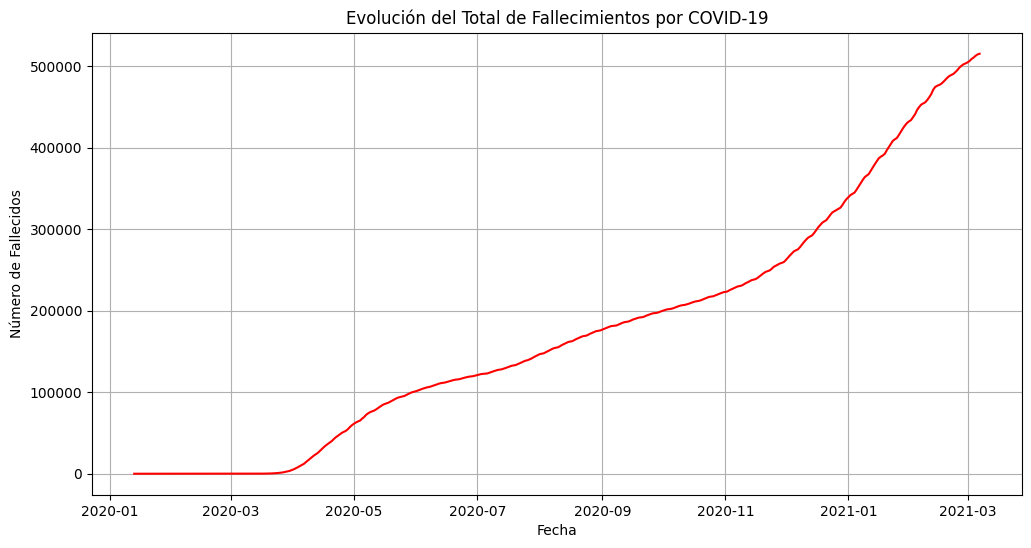

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convertimos la columna 'date' a formato de fecha (datetime)
df['date'] = pd.to_datetime(df['date'])

# 2. Agrupamos los datos por fecha para sumar los valores de todos los estados
df_temporal = df.groupby('date')['death'].sum().reset_index()

# 3. Creamos la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temporal, x='date', y='death', color='red')
plt.title('Evolución del Total de Fallecimientos por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Número de Fallecidos')
plt.grid(True)
plt.show()

/var/folders/1p/w3s14y4d6h73sf2yqfjwgs2w0000gn/T/ipykernel_43521/4058556080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_estados, x='state', y='positive', palette='viridis')


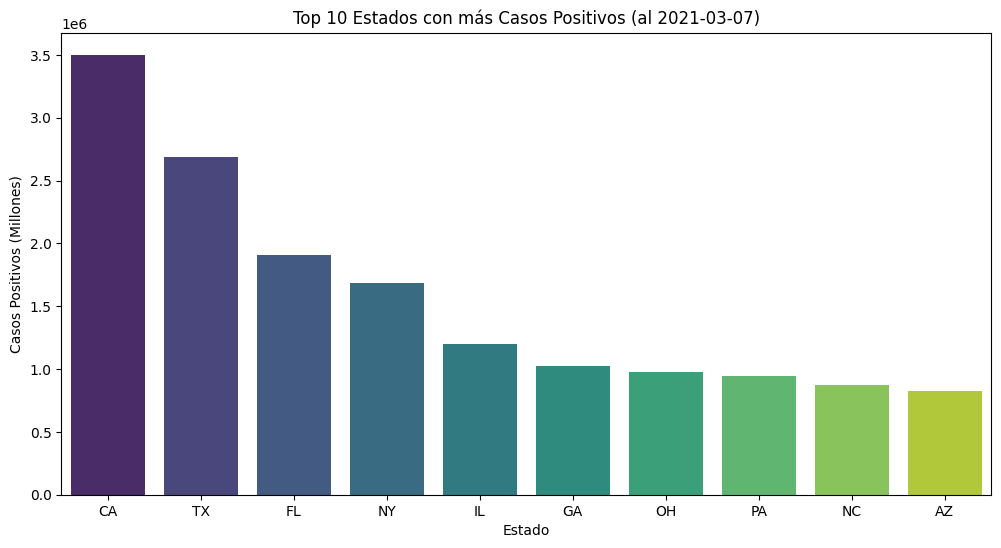

In [8]:
# 1. Buscamos la fecha más reciente en el dataset
ultima_fecha = df['date'].max()

# 2. Filtramos los datos para esa fecha
df_reciente = df[df['date'] == ultima_fecha]

# 3. Ordenamos por casos positivos y nos quedamos con los 10 mejores
top_10_estados = df_reciente.sort_values('positive', ascending=False).head(10)

# 4. Creamos la gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_estados, x='state', y='positive', palette='viridis')
plt.title(f'Top 10 Estados con más Casos Positivos (al {ultima_fecha.date()})')
plt.xlabel('Estado')
plt.ylabel('Casos Positivos (Millones)')
plt.show()

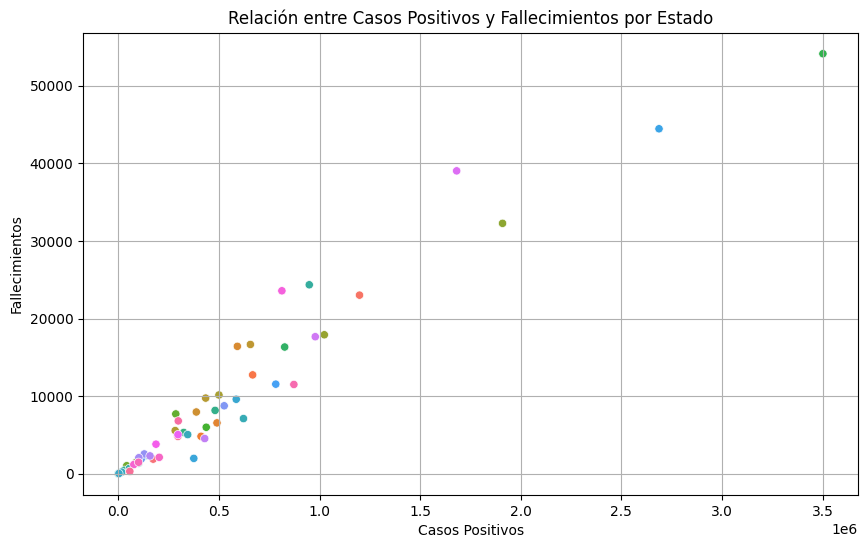

In [9]:
# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reciente, x='positive', y='death', hue='state', legend=False)

plt.title('Relación entre Casos Positivos y Fallecimientos por Estado')
plt.xlabel('Casos Positivos')
plt.ylabel('Fallecimientos')
plt.grid(True)
plt.show()

In [10]:
# 1. Calculamos el porcentaje: (muertes / positivos) * 100
df_reciente['lethality_rate'] = (df_reciente['death'] / df_reciente['positive']) * 100

# 2. Mostramos los 10 estados con mayor tasa de letalidad
top_letalidad = df_reciente[['state', 'positive', 'death', 'lethality_rate']].sort_values('lethality_rate', ascending=False).head(10)
top_letalidad

,state,positive,death,lethality_rate
34,NJ,812609.0,23574.0,2.901026
21,MA,591356.0,16417.0,2.776162
7,CT,285330.0,7704.0,2.700032
41,PA,948643.0,24349.0,2.566719
24,MI,656072.0,16658.0,2.539051
8,DC,41419.0,1030.0,2.486781
37,NY,1681169.0,39029.0,2.321539
28,MS,297581.0,6808.0,2.287780
20,LA,433785.0,9748.0,2.247196
22,MD,387319.0,7955.0,2.053863


/var/folders/1p/w3s14y4d6h73sf2yqfjwgs2w0000gn/T/ipykernel_43521/216251537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_letalidad, x='state', y='lethality_rate', palette='magma')


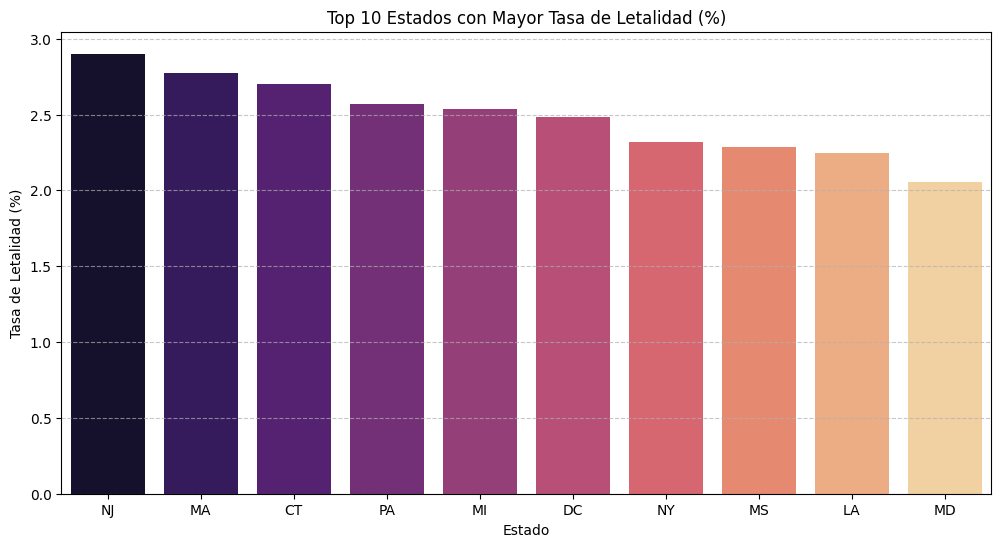

In [11]:
# Creamos una gráfica de barras para la tasa de letalidad
plt.figure(figsize=(12, 6))
sns.barplot(data=top_letalidad, x='state', y='lethality_rate', palette='magma')

plt.title('Top 10 Estados con Mayor Tasa de Letalidad (%)')
plt.xlabel('Estado')
plt.ylabel('Tasa de Letalidad (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df_reciente.to_csv("covid_analysis_results.csv", index=False)

print("¡Archivo guardado con éxito! ✅")




¡Archivo guardado con éxito! ✅
